<a href="https://colab.research.google.com/github/AMJAMAITHILI/ML_LAB-141/blob/main/ML_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = "https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv"
df = pd.read_csv(url)
print(df.isnull().sum())

text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64


In [ ]:
null_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
print(null_cols)

[]


In [ ]:
#Quasi features
from sklearn.model_selection import train_test_split
label_columns = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
                 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
                 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
                 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
                 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

x_train, x_test, y_train, y_test = train_test_split(
    df[['text']],            # features: only text
    df[label_columns],       # labels: all emotion columns
    test_size=0.3,
    random_state=0
)
constant_features = [
    feature for feature in y_test.columns if y_test[feature].std() == 0
]



In [ ]:
#Quasi constant features
from sklearn.model_selection import train_test_split
import pandas as pd

# Split first (using text and labels from GoEmotions)
label_columns = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
                 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
                 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
                 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
                 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

x_train, x_test, y_train, y_test = train_test_split(
    df.drop(columns=label_columns),   # features: drop all label columns
    df[label_columns],                # labels
    test_size=0.3,
    random_state=0
)

quasi_constant_features = []

for col in x_train.columns:
    top_freq = x_train[col].value_counts(normalize=True).max()
    if top_freq > 0.99:      # appears in 99% of rows
        quasi_constant_features.append(col)

print("Quasi-constant features found:", quasi_constant_features)

# Drop from train & test
x_train.drop(columns=quasi_constant_features,axis=1,inplace=True)
x_test.drop(columns=quasi_constant_features,axis=1,inplace=True)

print("New shape (x_train):", x_train.shape)
print("New shape (x_test):", x_test.shape)
'''quasi_constant_features = []
for col in df.columns:
    top_freq = df[col].value_counts(normalize=True).max()
    if top_freq > 0.99:
        quasi_constant_features.append(col)

print("Quasi-Constant Features:", quasi_constant_features)

df = df.drop(columns=quasi_constant_features)
'''


Quasi-constant features found: []
New shape (x_train): (49000, 9)
New shape (x_test): (21000, 9)


In [ ]:
# Duplicate features
duplicate_features = []

# Iterate over columns
for i in range(len(x_train.columns)):
    col1 = x_train.columns[i]
    for j in range(i + 1, len(x_train.columns)):
        col2 = x_train.columns[j]

        # Check if both columns are identical
        if x_train[col1].equals(x_train[col2]):
            duplicate_features.append(col2)

print("Duplicate features found:", duplicate_features)

# Drop duplicates
x_train.drop(columns=duplicate_features, inplace=True)
x_test.drop(columns=duplicate_features, inplace=True)

print("New shape (x_train):", x_train.shape)
""" Drop duplicates directly
x_train_T = x_train.T           # transpose: columns become rows->fn of rows
x_train_T = x_train_T.drop_duplicates(keep='first')
x_train = x_train_T.T           # transpose back

# Apply same to x_test
x_test = x_test[x_train.columns]

print("Shape after duplicate feature removal:", x_train.shape)
"""

Duplicate features found: []
New shape (x_train): (49000, 9)


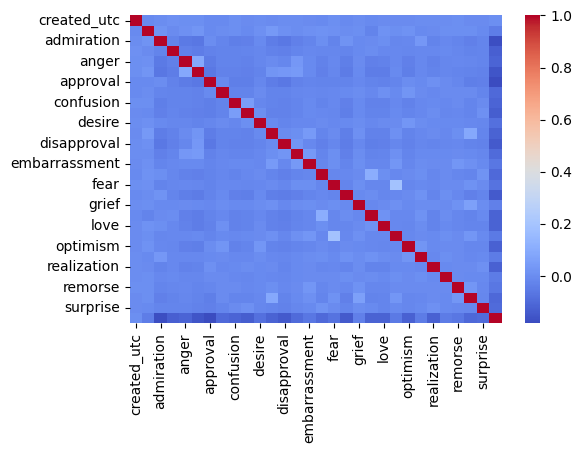

In [ ]:
#Correlation
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

Number of correlated features: 0


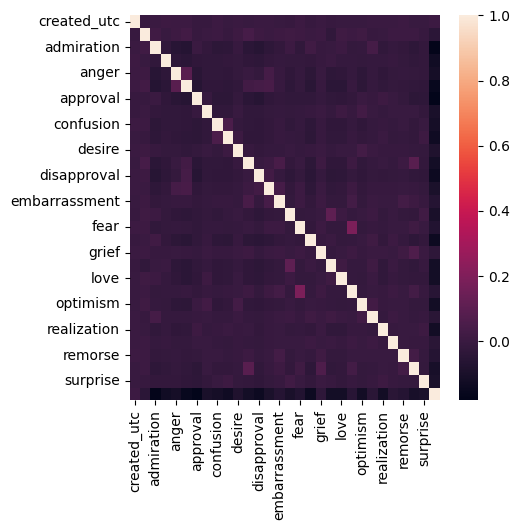

In [ ]:
# Keep only numeric columns for correlation
X = df.select_dtypes(include='number')
corrmat = X.corr()

fig, ax = plt.subplots()
fig.set_size_inches(5,5)
sns.heatmap(corrmat)
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X, 0.9)
correlated_features = set(corr_features)
print("Number of correlated features:", len(correlated_features))
